README

UWN 2010-10
Gerard de Melo
http://www.mpi-inf.mpg.de/yago-naga/uwn/


== DESCRIPTION ==

UWN is an automatically constructed multilingual lexical knowledge base
based on the structure of Princeton WordNet. Please see the web site above
for more information.

UWN is best used in conjunction with the original WordNet created at
at Princeton University. 
http://wordnet.princeton.edu


== DATA FORMAT ==

The gzip-compressed TSV file is best decompressed on the fly
while reading for best performance. Each line contains subject, predicate,
object, and weight, separated by tabs.
Words and other terms are listed as "t/<iso-639-3-language-code>/<string>", e.g.
"t/eng/house" for the English term "house".
Predicates include "rel:means" for the relationship between a term and its meanings.
WordNet senses are given as "s/<wordnet-pos-tag><wordnet-3.0-synset-offset>"
(e.g. "s/n1740" for WordNet 3.0's entity synset).


== CREDITS AND LICENSE ==

Gerard de Melo
http://icsi.berkeley.edy/~demelo/

For academic use, please cite:
Gerard de Melo and Gerhard Weikum (2009). Towards a Universal Wordnet by Learning from Combined Evidence.
In: Proc. 18th ACM Conference on Information and Knowledge Management (CIKM 2009),
Hong Kong, China. ACM, New York, USA.

License: CC BY-NC-SA 3.0
http://creativecommons.org/licenses/by-nc-sa/3.0/

In [7]:
import pandas as pd

df = pd.read_csv('./wordnet/data/uwn-dump_201012.tsv', delimiter='\t', header=None, names=['subject', 'predicate', 'object', 'weight'])

In [10]:
df.head()

,subject,predicate,object,weight
0,t/xmf/ბულგარულ,rel:means,language/bul,1.187343
1,t/xmf/ბულგარულ,rel:means,s/n9695620,1.224455
2,t/xmf/ინგლისურ,rel:means,s/n6155432,0.938639
3,t/xmf/ინგლისურ,rel:means,s/n6947032,1.220780
4,t/xmf/ფრანგულ,rel:means,language/fra,1.337511


In [12]:
terms = df[df.subject.str.startswith('t/')]

In [13]:
synsets = df[df.subject.str.startswith('s/')]

In [15]:
terms.predicate.value_counts()

rel:means    1848113
Name: predicate, dtype: int64

In [17]:
synsets.predicate.value_counts()

rel:lexicalization    1810685
Name: predicate, dtype: int64

Not sure what weight means... 

In [69]:
synsets.head(20)

,subject,predicate,object,weight
13,s/n9002814,rel:lexicalization,t/tha/รัสเซีย,0.703229
14,s/n9002814,rel:lexicalization,t/tur/Rusya Federasyonu,0.730033
15,s/n9002814,rel:lexicalization,t/arb/روسيا,0.763194
16,s/n9002814,rel:lexicalization,t/ara/روسيا,0.707933
17,s/n9002814,rel:lexicalization,t/vol/Rusän,0.763194
18,s/n9002814,rel:lexicalization,t/lfn/Rusia,0.763194
19,s/n9002814,rel:lexicalization,t/ind/Rusia,0.733253
20,s/n9002814,rel:lexicalization,t/pes/روسیه,0.763194
21,s/n9002814,rel:lexicalization,t/hun/Oroszország,0.735622
22,s/n9002814,rel:lexicalization,t/lit/Rusijos Federacija,0.730033


In [94]:
def extract_language(x):
    split = x.split('/')
    lan = split[1]
    return lan

def extract_term(x):
    split = x.split('/')
    term = split[2]
    return term

def extract_synset(x):
    split = x.split('/')
    synset = split[1]
    return synset

In [95]:
terms = terms[terms.object.str.startswith('s/')]
terms.loc[:, 'term'] = terms.subject.apply(extract_term)
terms.loc[:, 'lan'] = terms.subject.apply(extract_language)
terms.loc[:, 'synset'] = terms.object.apply(extract_synset)

In [100]:
t = terms.drop(['subject', 'predicate', 'object'], axis=1)

In [115]:
t[t.term == 'Russia'].synset.apply(lambda x: x.replace('n', ''))

20953      9007723
1037000    9010300
1037001    9007723
1037002    9002630
1037003    9008454
1609121    9002814
1609122    9007723
1609128    9007723
Name: synset, dtype: object

In [112]:
['9025654', '9030093', '9025184', '9028783']

['9025654', '9030093', '9025184', '9028783']

In [116]:
t[t.term == 'Russia'].lan

20953      zsm
1037000    eng
1037001    eng
1037002    eng
1037003    eng
1609121    ina
1609122    ina
1609128    ita
Name: lan, dtype: object

In [168]:
import os

columns = ['synset', 'type', 'text']
wns = pd.DataFrame(columns=columns)

for lan in os.listdir('./wordnet/data/wns/'):
    filename = f'./wordnet/data/wns/{lan}/wn-data-{lan}.tab'
    if os.path.isfile(filename):
        df = pd.read_csv(filename, delimiter='\t', names=columns, index_col=False, skiprows=1)
        wns = pd.concat([wns, df],axis=0, ignore_index=True)

In [183]:
wns.head()

,synset,type,text,lan
0,00001740-n,fin:lemma,entiteetti,fin
1,00001740-n,fin:lemma,kokonaisuus,fin
2,00001930-n,fin:lemma,fyysinen entiteetti,fin
3,00002137-n,fin:lemma,abstrahointi,fin
4,00002137-n,fin:lemma,käsitteellistäminen,fin


In [192]:
def extract_language_2(x):
    split = x.split(':')
    lan = split[0]
    return lan

def extract_type(x):
    split = x.split(':')
    _type = split[1]
    return _type

In [193]:
wns['type'] = wns['type'].replace('lemma', 'fin:lemma')
wns['lan'] = wns.type.apply(extract_language_2)
wns['type'] = wns.type.apply(extract_type)

In [194]:
import seaborn as sns

<AxesSubplot:ylabel='type'>

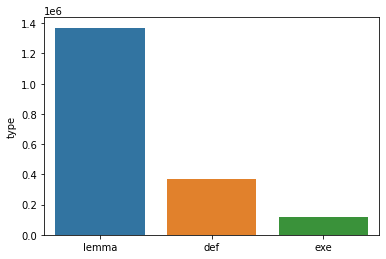

In [195]:
sns.barplot(x=wns.type.value_counts().index, y=wns.type.value_counts())

In [197]:
wns.lan.value_counts()

fin    567164
jpn    342037
eng    183968
ron    143393
fra    102671
slv     69405
ita     67441
nld     60259
arb     54975
pol     52380
hrv     47900
slk     44029
ell     42251
bul     28382
als     17626
isl     15462
heb     13481
swe      6989
Name: lan, dtype: int64

In [199]:
wns[wns.type == 'exe'].tex

,synset,type,text,lan
256500,00003553-n,exe,0,als
256501,00003553-n,exe,1,als
256507,00006269-n,exe,0,als
256523,00007846-n,exe,0,als
256528,00007739-v,exe,0,als
